# Problem Statement
An education company named X-Education sells online courses to industry professionals. The company markets its 
courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now although X Education gets a lot of leads,its lead conversion rate is very poor.
For example if they say they acquire 100 leads in a day,only about 30 of them are converted.



## Goals
1. X Education has appointed you to help them select the most promising leads i.e the leads that are most likely to convert into paying customers.
2. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [138]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score


### Reading Leads data file

In [140]:
leads_df = pd.read_csv('./Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


#### Inspect dataframe 

In [141]:
print(leads_df.columns)
print("") # empty line for formatting

print("Shape: " + str(leads_df.shape))
print("") # empty line for formatting

print("dtypes: " + str(leads_df.dtypes))
print("") # empty line for formatting

print("describe: " + str(leads_df.describe()))     
print("") # empty line for formatting
      
print(leads_df.info)
print("") # empty line for formatting

print("Size of frame: " + str(leads_df.size))

#printing few rows
leads_df.head()


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Shape: (92

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### Converting Select Value to Nan values

In [142]:
# As select means that the values have not been selected by the user, Converting them to NAn will help to analyse it correctly.
leads_df = leads_df.replace('Select', np.nan)

### Inspect Null values for cleaning the dataframe        

In [143]:
# Check column-wise null count
leads_df.isnull().sum(axis = 0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [144]:
# Check row-wise null count
leads_df.isnull().sum(axis = 1)

0       5
1       5
2       1
3       1
4       2
5       9
6       0
7       9
8       6
9       5
10      2
11      3
12      2
13      3
14      5
15      4
16      9
17      4
18      3
19      4
20      1
21      3
22      0
23      1
24      1
25      1
26      1
27      0
28      4
29      1
       ..
9210    0
9211    0
9212    1
9213    6
9214    8
9215    6
9216    1
9217    4
9218    5
9219    1
9220    2
9221    6
9222    0
9223    1
9224    1
9225    1
9226    5
9227    0
9228    6
9229    1
9230    1
9231    0
9232    1
9233    9
9234    1
9235    1
9236    1
9237    1
9238    5
9239    1
Length: 9240, dtype: int64

In [145]:
# Check the precentage of missing values present - column-wise null percentages
print(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)) # round for 2 decimal places

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [146]:
#dropping cols with more than 40% missing values

cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 40):
        leads_df.drop(i, 1, inplace = True)

#Print Columns to check 
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [147]:
# Check the precentage of missing values present - column-wise null percentages
print(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)) # round for 2 decimal places

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [148]:
# Checking Country Column values
leads_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
Kuwait                     4
Canada                     4
South Africa               4
Sweden                     3
Uganda                     2
Bangladesh                 2
Philippines                2
Ghana                      2
Belgium                    2
Netherlands                2
Italy                      2
Asia/Pacific Region        2
China                      2
Denmark                    1
Switzerland                1
Liberia                    1
Tanzania                   1
Russia                     1
Malaysia                   1
Vietnam       

__It can be seen that India has highest number of records. hence imputing NAN values with India__

In [149]:
leads_df['Country'] = leads_df['Country'].replace(np.nan,'India')

In [150]:
# Checking Country Column values
leads_df.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
Kuwait                     4
Canada                     4
South Africa               4
Sweden                     3
Uganda                     2
Bangladesh                 2
Philippines                2
Ghana                      2
Belgium                    2
Netherlands                2
Italy                      2
Asia/Pacific Region        2
China                      2
Denmark                    1
Switzerland                1
Liberia                    1
Tanzania                   1
Russia                     1
Malaysia                   1
Vietnam       

__As can be seen the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped__

In [151]:
leads_df.drop('Country',axis=1,inplace=True)

In [152]:
#checking City Column Value Count
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [153]:
# As Mumbai has highest value, imputing Nan with mumbai
leads_df['City'] = leads_df['City'].replace(np.nan,'Mumbai')

#checking City Column Value Count
leads_df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [154]:
#checking value counts of Specialization column
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [155]:
# As Specialisation is not specified and we dont have any value high enough to impute, Lets use Not Specified for Nan
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Specified')

#checking value counts of Specialization column
leads_df['Specialization'].value_counts(dropna=False)


Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [156]:
#combining Management Specializations 
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [157]:
#checking value counts of Last Notable Activity column
leads_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [158]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [159]:
#Checking values for What is your current occupation
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [160]:
#imputing Nan values with mode "Unemployed"
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

#Checking values for What is your current occupation
leads_df['What is your current occupation'].value_counts(dropna=False)


Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [161]:
# Now check the value counts for 'What matters most to you in choosing a course' column there
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [162]:
# Since Better Career Prospects makes the whole data frame, dropping it from the list
leads_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [163]:
#checking value counts of Tag variable
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [164]:
#replacing Nan values with "Not Specified" as Dataframe has a mixture of value counts
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Not Specified')

In [165]:
# Also converting small amounts into Others
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP',                                             
                                             'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized',
                                    'switched off','Already a student','Not doing further education',
                                    'invalid number','wrong number given', 'Interested  in full time MBA'], 'Other_Tags')

#checking value counts of Tag variable
leads_df['Tags'].value_counts(dropna=False)


Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [166]:
#checking Lead Source column values
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
testone                 1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

In [167]:
# We can Replace Nan with others as value count is small
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Others')

In [168]:
# changing google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

# we can also convert small values of Lead Source into others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')     

#checking Lead Source column values
leads_df['Lead Source'].value_counts(dropna=False)


Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                57
Facebook              55
Social Media           2
Name: Lead Source, dtype: int64

In [169]:
# Checking Last Activity value count
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [170]:
# We can Replace Nan with others as value count is small
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Others')

In [171]:
# we can also convert small values of last activity into others
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [172]:
# Check the precentage of missing values present - column-wise null percentages
print(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)) # round for 2 decimal places

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses  

In [173]:
#Drop all rows which have Nan Values as the % of Nan is very very small
leads_df.dropna(inplace=True)

# Check the precentage of missing values present - column-wise null percentages
print(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)) # round for 2 decimal places


Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses  

### Checking Lead Number and ProspectsId column for duplicates and as they are just ID, so can be dropeed

In [174]:
print("No Duplicates in ProspectId: " +  str(sum(leads_df.duplicated(subset = 'Prospect ID')) == 0))
print("No Duplicates in lead Number: " + str(sum(leads_df.duplicated(subset = 'Lead Number')) == 0))


No Duplicates in ProspectId: True
No Duplicates in lead Number: True


In [175]:
#Dropping Lead Number and Prospects Id columns
leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

#Print Columns to check 
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Univariate Analysis

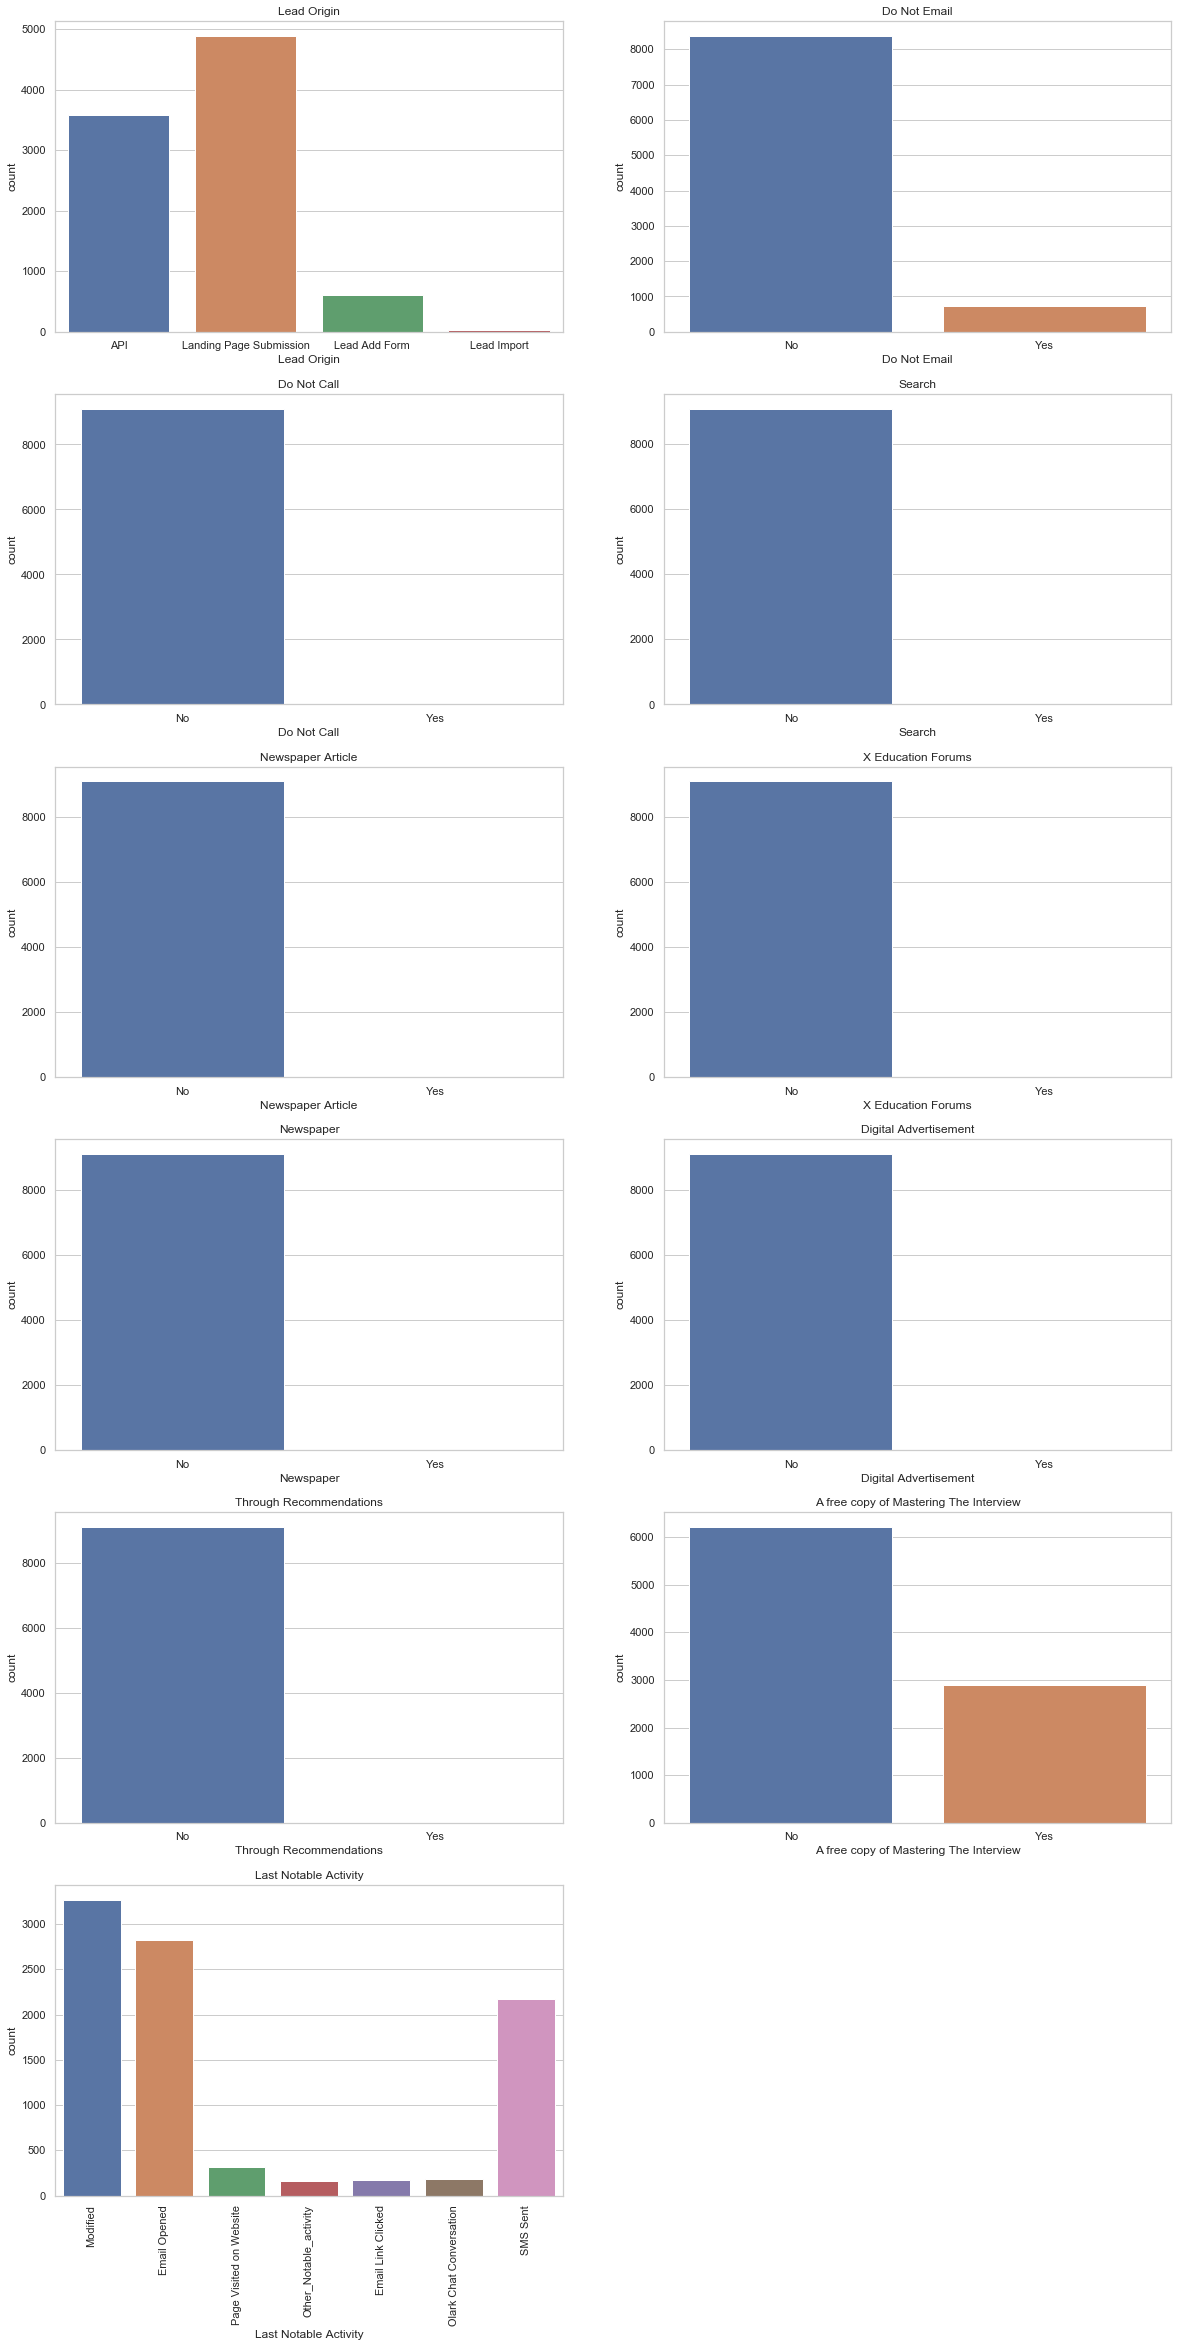

In [176]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads_df['Search'])
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(leads_df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(leads_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(leads_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(leads_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(leads_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(leads_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(leads_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

Text(0.5,0.98,'Boxplot of Leads Data')

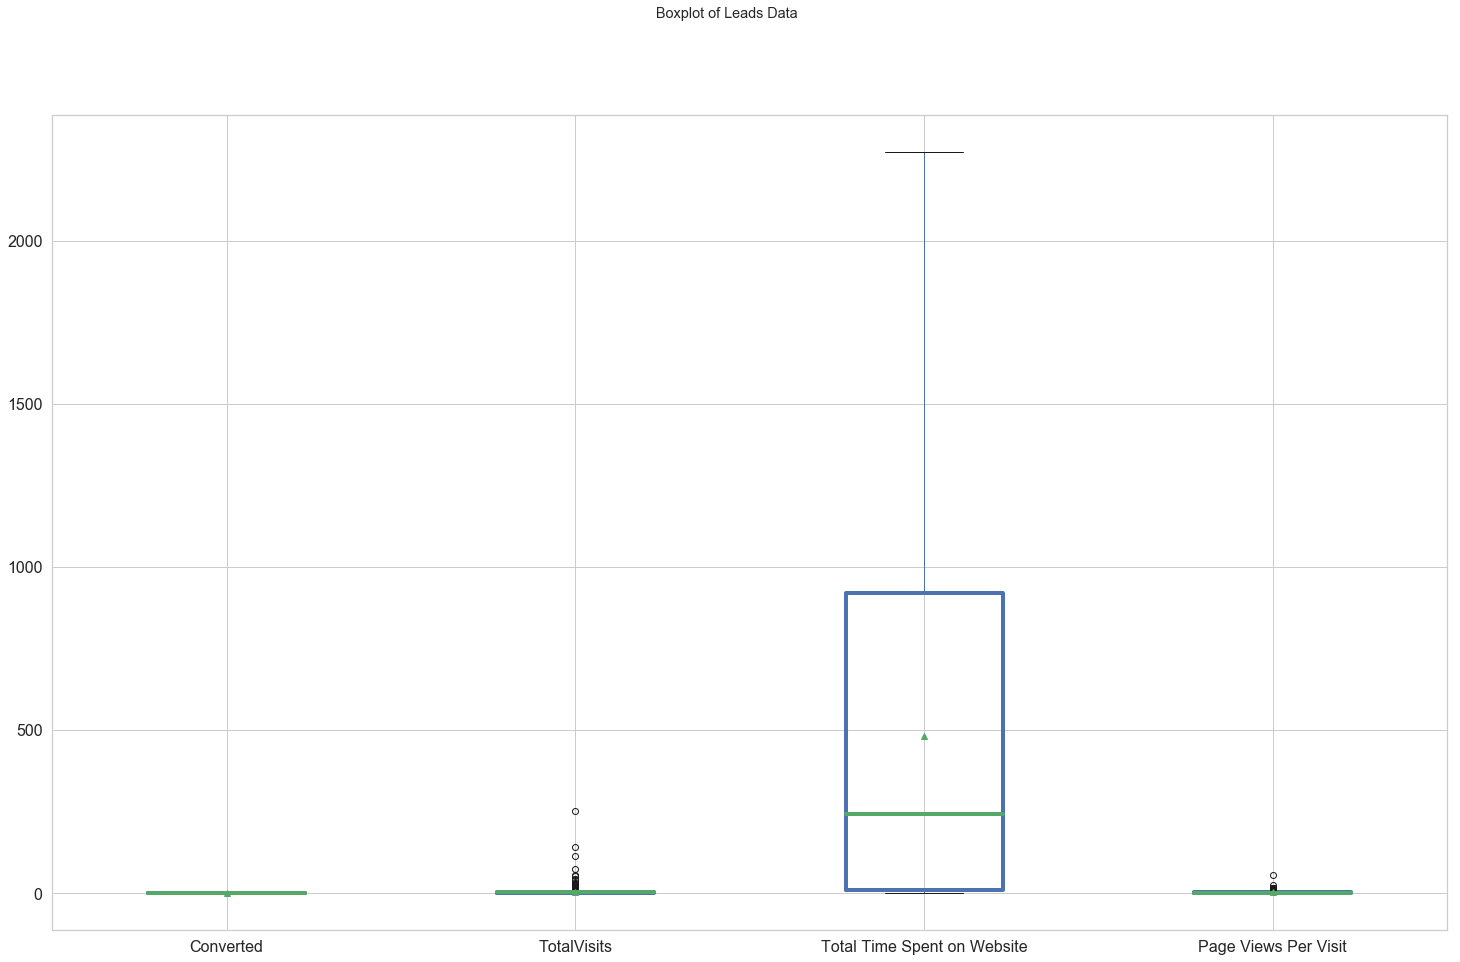

In [177]:
sns.set(style="whitegrid")
#ax = sns.boxplot(y="gdpp",data=countries_df)
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
leads_df.boxplot(figsize=(25,15), fontsize=16,boxprops=boxprops, medianprops=medianprops,showfliers=True, showmeans=True)

plt.suptitle("Boxplot of Leads Data")


__TotalVisits and Page Views Per Visit columns seem to be having outliers__

In [178]:
# Checking totalVisits percentles 
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9103.00
mean       3.45
std        4.85
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

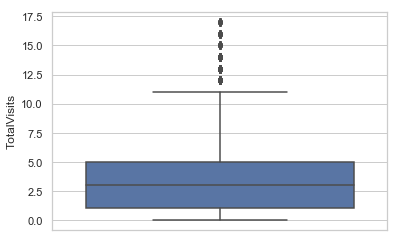

In [179]:
# Removing top & bottom 1% of the Total Visits Column to clear outliers
Q3 = leads_df.TotalVisits.quantile(0.99)
leads_df = leads_df[(leads_df.TotalVisits <= Q3)]
Q1 = leads_df.TotalVisits.quantile(0.01)
leads_df = leads_df[(leads_df.TotalVisits >= Q1)]
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [180]:
# Checking Page Views Per Visit percentles 
leads_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9020.00
mean       2.34
std        2.06
min        0.00
5%         0.00
25%        1.00
50%        2.00
75%        3.00
90%        5.00
95%        6.00
99%        9.00
max       16.00
Name: Page Views Per Visit, dtype: float64

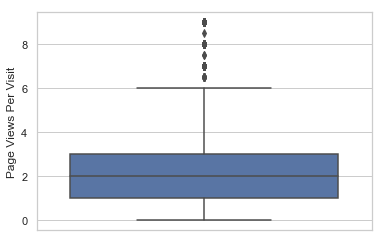

In [181]:
# Removing top & bottom 1% of the Page Views Per Visit Column to clear outliers
Q3 = leads_df['Page Views Per Visit'].quantile(0.99)
leads_df = leads_df[leads_df['Page Views Per Visit'] <= Q3]
Q1 = leads_df['Page Views Per Visit'].quantile(0.01)
leads_df = leads_df[leads_df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()


### Checking Any imblanaced columns

In [182]:
leads_df.Search.value_counts(dropna=False)

No     8940
Yes      13
Name: Search, dtype: int64

In [183]:
# There is high value of No compared to Yes and hence dropping search column
leads_df.drop('Search',axis=1,inplace=True)

In [184]:
leads_df['Do Not Call'].value_counts(dropna=False)

No     8951
Yes       2
Name: Do Not Call, dtype: int64

In [185]:
# There is high value of No compared to Yes and hence dropping Do Not Call column
leads_df.drop('Do Not Call',axis=1,inplace=True)

In [186]:
leads_df.Magazine.value_counts(dropna=False)

No    8953
Name: Magazine, dtype: int64

In [187]:
# There is high value of No and hence dropping Magazine column
leads_df.drop('Magazine',axis=1,inplace=True)

In [188]:
leads_df['Newspaper Article'].value_counts(dropna=False)

No     8952
Yes       1
Name: Newspaper Article, dtype: int64

In [189]:
# There is high value of No compared to Yes and hence dropping Newspaper Article column
leads_df.drop('Newspaper Article',axis=1,inplace=True)

In [190]:
leads_df['X Education Forums'].value_counts(dropna=False)

No    8953
Name: X Education Forums, dtype: int64

In [191]:
# There is high value of No and hence dropping X Education Forums column
leads_df.drop('X Education Forums',axis=1,inplace=True)

In [192]:
leads_df['Newspaper'].value_counts(dropna=False)

No     8952
Yes       1
Name: Newspaper, dtype: int64

In [193]:
# There is high value of No compared to Yes and hence dropping Newspaper  column
leads_df.drop('Newspaper',axis=1,inplace=True)

In [194]:
leads_df['Digital Advertisement'].value_counts(dropna=False)

No     8950
Yes       3
Name: Digital Advertisement, dtype: int64

In [195]:
# There is high value of No compared to Yes and hence dropping Digital Advertisement  column
leads_df.drop('Digital Advertisement',axis=1,inplace=True)

In [196]:
leads_df['Through Recommendations'].value_counts(dropna=False)

No     8947
Yes       6
Name: Through Recommendations, dtype: int64

In [197]:
# There is high value of No compared to Yes and hence dropping Through Recommendations column
leads_df.drop('Through Recommendations',axis=1,inplace=True)

In [198]:
leads_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    8953
Name: Receive More Updates About Our Courses, dtype: int64

In [199]:
# There is high value of No  and hence dropping Receive More Updates About Our Courses  column
leads_df.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [200]:
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    8953
Name: Update me on Supply Chain Content, dtype: int64

In [201]:
# There is high value of No  and hence dropping Update me on Supply Chain Content  column
leads_df.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [202]:
leads_df['Get updates on DM Content'].value_counts(dropna=False)

No    8953
Name: Get updates on DM Content, dtype: int64

In [203]:
# There is high value of No and hence dropping and hence dropping Get updates on DM Content column
leads_df.drop('Get updates on DM Content',axis=1,inplace=True)

In [204]:
leads_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    8953
Name: I agree to pay the amount through cheque, dtype: int64

In [205]:
# There is high value of No and hence dropping I agree to pay the amount through cheque  column
leads_df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [206]:
# Inspecting Data frame
print(leads_df.columns)
print("") # empty line for formatting

print("Shape: " + str(leads_df.shape))
print("") # empty line for formatting

print("dtypes: " + str(leads_df.dtypes))
print("") # empty line for formatting

print("describe: " + str(leads_df.describe()))     
print("") # empty line for formatting
      
print(leads_df.info)
print("") # empty line for formatting

print("Size of frame: " + str(leads_df.size))

#printing few rows
leads_df.head()


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

Shape: (8953, 14)

dtypes: Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Tags                                       object
City                                       object
A free copy of Mastering The Int

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


## Correlation using Heat map

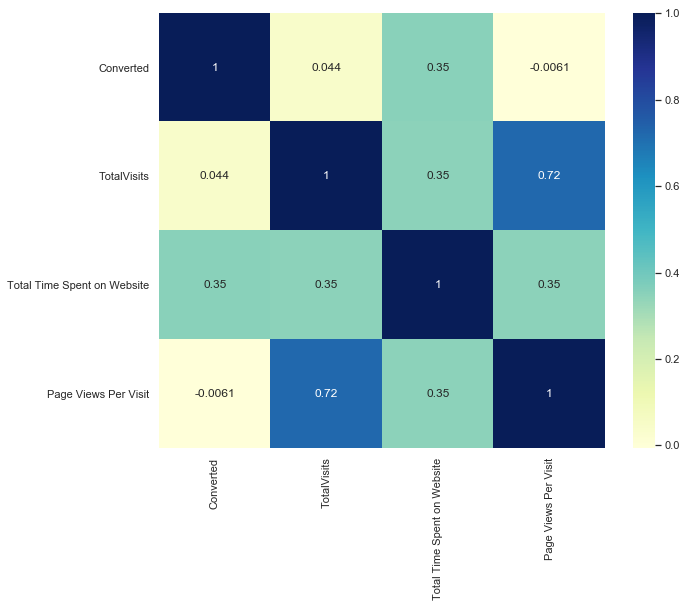

In [207]:
#Checking correlations of numeric values
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

__It can be seen that totalVisits and Page View Per visit has highest correlation of 0.72__

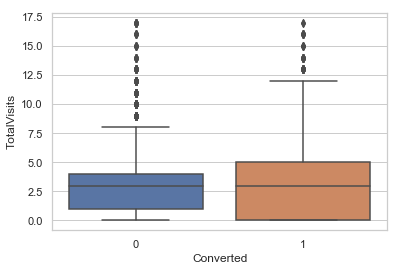

In [208]:
#checking "Total Visits" vs Converted variable values
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

__Median is same for both the variables.__

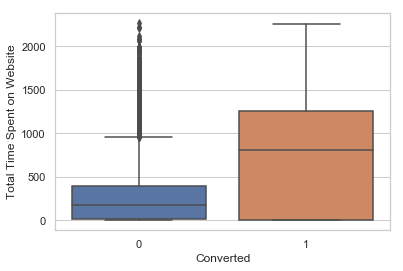

In [209]:
#checking "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads_df.Converted, y=leads_df['Total Time Spent on Website'])
plt.show()

__It  can be seen that Leads spending more time on website are likely to be converted.__

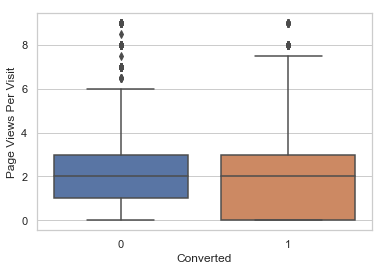

In [210]:
#checking "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads_df.Converted,y=leads_df['Page Views Per Visit'])
plt.show()

__Median is same for both the variables.__

### Dummy variable creation

In [211]:
# Get the categorical columns from the columns list- using object type
categorical_cols= leads_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [212]:
# 'Do not email' and 'A free copy of Mastering The Interview' is yes/no columns, hence converting them to 1/0
leads_df['Do Not Email']= leads_df['Do Not Email'].map(dict(Yes=1, No=0))
leads_df['A free copy of Mastering The Interview']= leads_df['A free copy of Mastering The Interview'].map(dict(Yes=1, No=0))

# check data
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.00,0,0.00,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.00,674,2.50,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [213]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation', 'Tags',
                              'Last Notable Activity','A free copy of Mastering The Interview','City']], drop_first=True)


dummy = dummy.drop(['Lead Source_Others'], 1)
dummy = dummy.drop(['Last Activity_Others'], 1)
dummy = dummy.drop(['Tags_Not Specified'], 1)
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)

# Add the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)


In [214]:
dummy = pd.get_dummies(leads_df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads_df = pd.concat([leads_df, dummy], axis = 1)

#Check Data
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.00,0,0.00,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.00,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [215]:
# Drop the variables for which the dummy variables have been created

leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation','Tags',
                   'A free copy of Mastering The Interview', 'Last Notable Activity','City',
                         'A free copy of Mastering The Interview',], 1)


In [216]:
#Check Data
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.00,0,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532,2.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.00,1428,1.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Train-Test Split & Logistic Regression Model Building:

In [217]:
# Put all the feature variables in X

X = leads_df.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.00,0,0.00,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.00,674,2.50,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.00,1532,2.00,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.00,305,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.00,1428,1.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
# Put the target variable in y
Y = leads_df['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [219]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 52 columns):
TotalVisits                                             6267 non-null float64
Total Time Spent on Website                             6267 non-null int64
Page Views Per Visit                                    6267 non-null float64
Lead Origin_Landing Page Submission                     6267 non-null uint8
Lead Origin_Lead Add Form                               6267 non-null uint8
Lead Origin_Lead Import                                 6267 non-null uint8
Lead Source_Facebook                                    6267 non-null uint8
Lead Source_Google                                      6267 non-null uint8
Lead Source_Olark Chat                                  6267 non-null uint8
Lead Source_Organic Search                              6267 non-null uint8
Lead Source_Reference                                   6267 non-null uint8
Lead Source_Referral Sites                        

### Scaling of Data:

In [220]:
# it will be good to use StandardSCaler to scale the data

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()



,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
9196,0.67,1.85,1.46,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4696,-0.03,-0.04,0.40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3274,0.32,-0.64,-0.13,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2164,-0.38,-0.15,-0.13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1667,0.32,1.26,-0.48,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Model Building using RFE

In [221]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables
rfe = rfe.fit(X_train, y_train)

In [222]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 14),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupatio

In [223]:
#list of RFE supported columns
col_supported = X_train.columns[rfe.support_]
col_supported

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Specialization_Travel and Tourism'],
      dtype='object')

In [224]:
# let's use these variables to create a logistic regression model using statsmodels.
# Train model using supported variables
X_train = X_train[col_supported]


In [225]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1235.3
Date:                Mon, 14 Sep 2020   Deviance:                       2470.6
Time:                        10:54:36   Pearson chi2:                 7.92e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7384      0.100    -17.455      0.000      -1.934      -1.543
Total Time Spent on Website                       1.0977      0.061     17.977      0.000       0.978       1.217
Lead Origin_Lead Add Form                         2.2730      0.459      4.948      0.000       1.373       3.173
Lead Source_Olark Chat                            1.2490      0.146      8.537      0.000       0.962       1.536
Lead Source_Welingak Website                      4.0076      1.114      3.599      0.000       1.825       6.190
Last Activity_SMS Sent                            1.4218      0.229      6.197      0.000       0.972       1.871
Tags_Closed by Horizzon                           7.1172      1.020      6.976      0.000       5.117       9.117
Tags_Interested in other courses                 -2.0971      0.411     -5.107      0.000      -2.902      -1.292
Tags_Lost to EINS                                 5.5645      0.610      9.128      0.000       4.370       6.759
Tags_Other_Tags                                  -2.4700      0.214    -11.561      0.000      -2.889      -2.051
Tags_Ringing                                     -3.6034      0.245    -14.683      0.000      -4.084      -3.122
Tags_Will revert after reading the email          4.5692      0.190     24.066      0.000       4.197       4.941
Last Notable Activity_Modified                   -1.3494      0.151     -8.955      0.000      -1.645      -1.054
Last Notable Activity_Olark Chat Conversation    -2.0628      0.490     -4.211      0.000      -3.023      -1.103
Last Notable Activity_SMS Sent                    0.8711      0.262      3.319      0.001       0.357       1.386
Specialization_Travel and Tourism                -1.1628      0.469     -2.481      0.013      -2.081      -0.244
=================================================================================================================
"""

__Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables__

In [226]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_supported].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_supported].values, i) for i in range(X_train[col_supported].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.37
4,Last Activity_SMS Sent,6.18
1,Lead Origin_Lead Add Form,1.86
11,Last Notable Activity_Modified,1.83
10,Tags_Will revert after reading the email,1.60
2,Lead Source_Olark Chat,1.47
0,Total Time Spent on Website,1.44
3,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.21
8,Tags_Other_Tags,1.17


__There is a high correlation between two variables so we drop the variable with the higher valued VIF value__

In [227]:
#dropping variable with high VIF
col_supported= col_supported.drop('Last Notable Activity_SMS Sent',1)
X_train.drop('Last Notable Activity_SMS Sent', axis = 1, inplace = True)


In [228]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.9
Date:                Mon, 14 Sep 2020   Deviance:                       2481.8
Time:                        10:54:37   Pearson chi2:                 8.01e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6750      0.096    -17.362      0.000      -1.864      -1.486
Total Time Spent on Website                       1.0944      0.061     18.015      0.000       0.975       1.213
Lead Origin_Lead Add Form                         2.2667      0.464      4.881      0.000       1.356       3.177
Lead Source_Olark Chat                            1.2757      0.145      8.799      0.000       0.992       1.560
Lead Source_Welingak Website                      3.9882      1.118      3.569      0.000       1.798       6.178
Last Activity_SMS Sent                            2.0773      0.116     17.970      0.000       1.851       2.304
Tags_Closed by Horizzon                           7.2907      1.021      7.140      0.000       5.289       9.292
Tags_Interested in other courses                 -2.0497      0.410     -5.001      0.000      -2.853      -1.246
Tags_Lost to EINS                                 5.7135      0.612      9.336      0.000       4.514       6.913
Tags_Other_Tags                                  -2.4181      0.211    -11.459      0.000      -2.832      -2.005
Tags_Ringing                                     -3.4950      0.241    -14.524      0.000      -3.967      -3.023
Tags_Will revert after reading the email          4.6416      0.192     24.136      0.000       4.265       5.019
Last Notable Activity_Modified                   -1.6544      0.125    -13.197      0.000      -1.900      -1.409
Last Notable Activity_Olark Chat Conversation    -2.1551      0.491     -4.389      0.000      -3.117      -1.193
Specialization_Travel and Tourism                -1.2037      0.465     -2.590      0.010      -2.115      -0.293
=================================================================================================================
"""

In [229]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.86
10,Tags_Will revert after reading the email,1.56
11,Last Notable Activity_Modified,1.49
4,Last Activity_SMS Sent,1.45
0,Total Time Spent on Website,1.44
2,Lead Source_Olark Chat,1.44
3,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.21
8,Tags_Other_Tags,1.15
6,Tags_Interested in other courses,1.12


__As p-values and VIF looks ok on features, lets derive predictions on Train data__ 

In [230]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196   0.26
4696   0.04
3274   0.43
2164   0.00
1667   0.99
7024   0.21
8018   0.03
778    0.12
6942   0.00
4440   0.12
dtype: float64

In [231]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25537921, 0.04172389, 0.42545912, 0.00387877, 0.98717961,
       0.20525595, 0.0290623 , 0.12294862, 0.00438005, 0.11526716])

In [232]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,1,0.26,9196
1,0,0.04,4696
2,0,0.43,3274
3,0,0.00,2164
4,1,0.99,1667


In [233]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,1,0.26,9196,0
1,0,0.04,4696,0
2,0,0.43,3274,0
3,0,0.00,2164,0
4,1,0.99,1667,1


## Calculating metrics

In [234]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3720  162]
 [ 300 2085]]


In [235]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9262805169937769


In [236]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [237]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8742138364779874

In [238]:
# calculate specificity
TN / float(TN+FP)

0.9582689335394127

In [239]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.04173106646058733


In [240]:
# positive predictive value 
print (TP / float(TP+FP))

0.9279038718291055


In [241]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9253731343283582


## ROC Curve

In [242]:
  def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [243]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

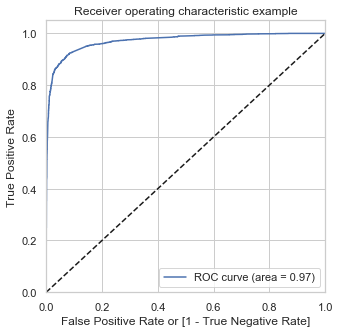

In [244]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

__The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.__

## Optimal Cutoff Point

In [245]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.26,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.04,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.43,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.00,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1


In [246]:
# create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.83   0.97   0.75
0.20  0.20      0.89   0.95   0.86
0.30  0.30      0.92   0.92   0.93
0.40  0.40      0.92   0.90   0.94
0.50  0.50      0.93   0.87   0.96
0.60  0.60      0.93   0.85   0.97
0.70  0.70      0.91   0.80   0.98
0.80  0.80      0.91   0.77   0.99
0.90  0.90      0.88   0.71   0.99


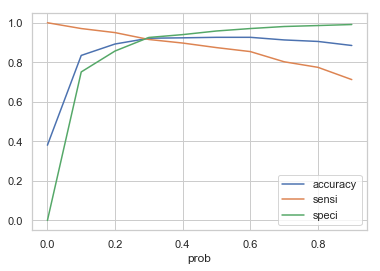

In [247]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [248]:
#### From the curve above, approx value of 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.26,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.04,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.43,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.00,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [249]:
## Adding Lead Core Column : Lead Score = 100 * ConversionProbability
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

# Display Data
y_train_pred_final[['Converted','Conversion_Prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Conversion_Prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.26,9196,0,26
1,0,0.04,4696,0,4
2,0,0.43,3274,1,43
3,0,0.00,2164,0,0
4,1,0.99,1667,1,99


## Metrics on Train Predicted Data of 0.3 cut off

In [250]:
# Let's check the overall accuracy.
accuracy_score= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
precision_score = precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)
recall_score = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

print("Accuracy Score:" + str(accuracy_score))
print("Precision Score:" + str(precision_score))
print("Recall Score:" + str(recall_score))
print("Confusion matrix:" + str(confusion2))



Accuracy Score:0.9216531035583214
Precision Score:0.8830906148867314
Recall Score:0.9153039832285115
Confusion matrix:[[3593  289]
 [ 202 2183]]


In [251]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
positivePredictedValue = TP / float(TP+FP)
negativePredictedValue = TN / float(TN+ FN)
precision =confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
print("Sensitivity:" + str(sensitivity))
print("Specificity:" + str(specificity))
print ("Positive Predicted Value: " + str(positivePredictedValue))
print ("Negative predictive value: " + str(negativePredictedValue))
print("Precision:" + str(precision))
print("Recall:" + str(recall))


Sensitivity:0.9153039832285115
Specificity:0.9255538382277176
Positive Predicted Value: 0.8830906148867314
Negative predictive value: 0.946772068511199
Precision:0.8830906148867314
Recall:0.9153039832285115


__We can observe from above metrics that model has got good metrics.__
- ROC curve has a very high value
- Accuracy is 92%
- Sensitivity is 91%
- precision is 88%
- Specificity is 92%



## Analysing the data using precision recall curve

In [252]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

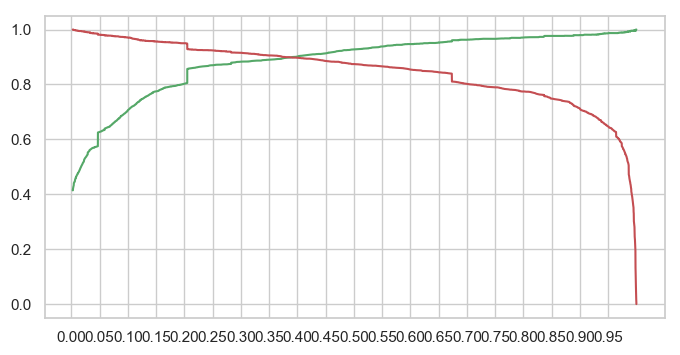

In [253]:
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

__From the precision-recall graph above, we get the optical threshold value as close to .37. However 0.3 has already achieved the Lead Conversion rate of 80%__

## Calcualating F1 Score on Train Data

In [254]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8989087914350423

__F1 score is 0.90 which is a very good measure of test accuracy.__

## Predictions on Test Data

In [255]:
# Scaling TestData  - Only Transform on Test Data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
7681,0.67,-0.30,0.14,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
984,-0.03,-0.54,0.40,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8135,-0.38,0.79,-0.13,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6915,0.32,-0.61,-0.13,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2712,-0.03,-0.41,0.40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [256]:
X_test = X_test[col_supported]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Specialization_Travel and Tourism
7681,-0.30,0,0,0,1,0,0,0,0,1,0,0,0,0
984,-0.54,0,0,0,1,0,0,0,1,0,0,1,0,0
8135,0.79,0,0,0,1,0,0,0,0,0,0,0,0,0
6915,-0.61,0,0,0,0,0,0,0,0,1,0,0,0,0
2712,-0.41,0,0,0,0,0,0,0,0,0,1,0,0,0


In [257]:
X_test_sm = sm.add_constant(X_test)

In [258]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681   0.03
984    0.01
8135   0.78
6915   0.00
2712   0.93
244    0.00
4698   0.01
8287   0.05
6791   0.98
8970   0.00
dtype: float64

In [259]:
# Converting y_pred to DataFrame
y_pred_df = pd.DataFrame(y_test_pred)
#Check the y_pred_
y_pred_df.head()

,0
7681,0.03
984,0.01
8135,0.78
6915,0.00
2712,0.93


In [260]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [261]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [262]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

#Check data after concatenation
y_pred_final.head()

,Converted,LeadID,0
0,0,7681,0.03
1,0,984,0.01
2,0,8135,0.78
3,0,6915,0.00
4,1,2712,0.93


In [263]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [264]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)
#Show data head
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,7681,0,0.03
1,984,0,0.01
2,8135,0,0.78
3,6915,0,0.00
4,2712,1,0.93


#### Using the probability threshold value 0f 0.3 on the test dataset to predict if a lead will convert

In [265]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
# Check data
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,7681,0,0.03,0
1,984,0,0.01,0
2,8135,0,0.78,1
3,6915,0,0.00,0
4,2712,1,0.93,1


In [266]:
# Adding Lead Score column:  Lead Score = 100 * ConversionProbability
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
# Check data
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,7681,0,0.03,0,3
1,984,0,0.01,0,1
2,8135,0,0.78,1,78
3,6915,0,0.00,0,0
4,2712,1,0.93,1,93


## Metrics on Test Predicted Data of 0.3 cut off

In [267]:
# Let's check the overall accuracy.
accuracy_score= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
confusion_test= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )

print("Accuracy Score:" + str(accuracy_score))
print("Recall Score:" + str(recall_score))
print("Confusion matrix:" + str(confusion_test))


Accuracy Score:0.9251675353685778
Recall Score:0.9153039832285115
Confusion matrix:[[1563  113]
 [  88  922]]


In [268]:

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives
sensitivity_test = TP / float(TP+FN)
specificity_test = TN / float(TN+FP)
positivePredictedValue = TP / float(TP+FP)
negativePredictedValue = TN / float(TN+ FN)
precision_test =confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
recall_test = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
print("Sensitivity:" + str(sensitivity_test))
print("Specificity:" + str(specificity_test))
print ("Positive Predicted Value: " + str(positivePredictedValue))
print ("Negative predictive value: " + str(negativePredictedValue))
print("Precision:" + str(precision_test))
print("Recall:" + str(recall_test))


Sensitivity:0.9128712871287129
Specificity:0.9325775656324582
Positive Predicted Value: 0.8908212560386474
Negative predictive value: 0.9466989703210176
Precision:0.8908212560386474
Recall:0.9128712871287129


__We can observe from above metrics that model has got good metrics.__
- Accuracy is 92%
- Sensitivity is 91%
- precision is 89%
- Specificity is 93%


## Calcualating F1 Score on Test Data

In [269]:
F1 = 2*(precision_test*recall_test)/(precision_test+recall_test)
F1

0.9017114914425428

__F1 score is 0.90 which is a very good measure of test accuracy.__

## Plotting the ROC Curve for Test Dataset


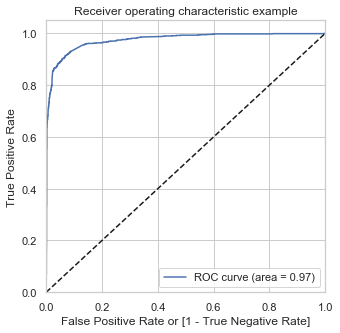

In [270]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

__The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good test model.__

## Checking for any overfit using Cross Validation score

In [271]:
lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, Y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.88926174 0.89709172 0.90401786 0.91629464 0.91731844 0.91852679
 0.92075893 0.92290503 0.92410714 0.9452514 ]
0.9155533685039574


__Cross Validation score is 0.91, which projects that the train test data was not overfit__

## Checking Feature importance based on regression model

In [272]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params


Total Time Spent on Website                      1.09
Lead Origin_Lead Add Form                        2.27
Lead Source_Olark Chat                           1.28
Lead Source_Welingak Website                     3.99
Last Activity_SMS Sent                           2.08
Tags_Closed by Horizzon                          7.29
Tags_Interested in other courses                -2.05
Tags_Lost to EINS                                5.71
Tags_Other_Tags                                 -2.42
Tags_Ringing                                    -3.49
Tags_Will revert after reading the email         4.64
Last Notable Activity_Modified                  -1.65
Last Notable Activity_Olark Chat Conversation   -2.16
Specialization_Travel and Tourism               -1.20
dtype: float64

In [273]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx


Total Time Spent on Website                       9
Lead Origin_Lead Add Form                         8
Lead Source_Olark Chat                           12
Lead Source_Welingak Website                      6
Last Activity_SMS Sent                           11
Tags_Closed by Horizzon                          13
Tags_Interested in other courses                  0
Tags_Lost to EINS                                 2
Tags_Other_Tags                                   4
Tags_Ringing                                      1
Tags_Will revert after reading the email          3
Last Notable Activity_Modified                   10
Last Notable Activity_Olark Chat Conversation     7
Specialization_Travel and Tourism                 5
dtype: int64

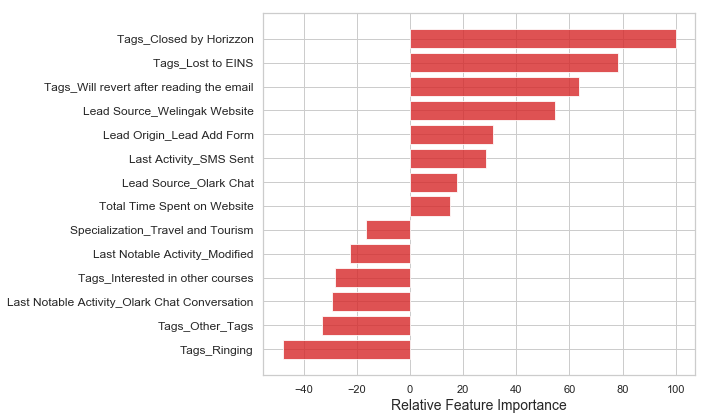

In [274]:
#Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col_supported].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

__we can see from above chart that top 3 features that contribute towards the probablility of a lead getting converted:__
- Tags_Closed by Horizzon
- Tags_Lost to EINS
- Tags_Will revert after reading the email.

# Conclusion

Model has following characteristics:
- All features have very less p-value
- All features have very low VIF, highlighting that multicollinearity among variables is less.
- The overall accuracy score is above 95%
- F1 score was above 90%, providing high model accuracy
- We have checked that model is not overfitting using cross value score of 0.91
- Top 3 features contributing to lead were identified using the model - they are 
    - Tags_Closed by Horizzon
    - Tags_Lost to EINS
    - Tags_Will revert after reading the email
    